# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


# Analysis/Modeling
Do work here

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here

# Знакомимся с данными

Напишите запрос, который выведет сезон (season), а также общее количество забитых мячей домашними (total_home_goals) и гостевыми (total_away_goals) командами.

Отсортируйте по столбцу с сезоном в порядке возрастания.

select season, sum(home_team_goals) as total_home_goals, sum(away_team_goals) as total_away_goals

from sql.matches

group by season

order by season asc

# Соединение таблиц по ключу

### ОБЪЕДИНЯЕМ ТАБЛИЦЫ БЕЗ ОПЕРАТОРОВ

Чтобы соединить две таблицы между собой, достаточно записать названия таблиц через запятую в разделе from. Что произойдёт в таком случае?

SELECT * /*выбор всех полей*/

FROM
    sql.teams, /*таблица с командами*/
    sql.matches /*таблица с матчами*/
    
Каждая запись, которая есть в таблице teams, будет соединена с каждой записью в таблице matches.

Это действие также называют декартовым произведением таблиц.

В исходных таблицах teams и matches было 299 и 25083 записей соответственно. Если соединить каждую запись одной таблицы с каждой записью другой, получится 299 * 25083 записей в итоговой таблице.
***

Напишите запрос, который выведет количество строк соединённой таблицы.


SELECT count(*)

FROM
    sql.teams, /*таблица с командами*/
    sql.matches /*таблица с матчами*/

***

В данном случае соединение таблиц не даёт практической пользы: мы получили очень много записей, которые никак не можем интерпретировать, потому что команды не соответствуют матчам.

Давайте исправим это. В таблице teams есть столбец api_id, а таблица matches содержит столбцы home_team_api_id и away_team_api_id — это ключи таблиц, по которым они соединяются.

>Ключ — это поле (столбец) в таблице, которое позволяет однозначно идентифицировать запись (строку).

Чтобы соединить таблицы и получить данные о домашней команде по каждому матчу, добавим условие
where home_team_api_id = api_id.

SELECT * /*выбор всех полей в таблице*/

FROM
    sql.teams, /*таблица с командами*/
    sql.matches /*таблица с матчами*/

WHERE home_team_api_id = api_id /*условие: home_team_api_id таблицы matches равен api_id таблицы teams*/
***

Аналогично можем получить данные о гостевых командах: необходимо изменить условие на
where away_team_api_id = api_id.

SELECT * /*выбор всех полей в таблицы*/

FROM
    sql.teams, /*таблица с командами*/
    sql.matches /*таблица с матчами*/

WHERE away_team_api_id = api_id /*условие: away_team_api_id таблицы matches равен api_id таблицы teams*/

Итак, мы только что объединили таблицы по ключу.

***
Ключи бывают двух основных типов:

- Primary — первичный ключ — служит для идентификации текущей таблицы и, как правило, идёт первым в списке столбцов. Всегда уникален: повторяющихся значений в основной таблице быть не может.
- Foreign — внешний ключ — представляет собой ссылку на другую таблицу.

Как правило, названия ключей имеют «хвост», который позволяет их идентифицировать: например, _id, _rk, _cd, _pk (от primary_key), _fk (от foreign_key) и другие.

***
С помощью известного нам запроса получим названия команд, игравших домашние матчи, и счёт матчей.

SELECT 
    long_name, /*столбец long_name таблицы teams*/
    home_team_goals, /*столбец home_team_goals таблицы matches*/
    away_team_goals /*столбец away_team_goals таблицы matches*/

FROM
    sql.teams, /*таблица с командами*/
    sql.matches /*таблица с матчами*/

WHERE home_team_api_id = api_id /*условие: home_team_api_id таблицы matches равен api_id таблицы teams*/
***

Напишите запрос, который выведет таблицу с результатами матчей для гостевых команд, содержащую:

- названия гостевых команд (long_name),
- количество забитых мячей домашней команды (home_team_goals),
- количество забитых мячей гостевой команды (away_team_goals).

# Знакомимся с JOIN

>JOIN — это оператор SQL, который позволяет соединять таблицы по условию.

SELECT 
    long_name, /*столбец long_name таблицы teams*/
    home_team_goals, /*столбец home_team_goals таблицы matches*/
    away_team_goals /*столбец away_team_goals таблицы matches*/

FROM    
    sql.teams /*таблица с командами*/

JOIN sql.matches on home_team_api_id = api_id /*оператор соединения таблиц; таблица matches; условие: home_team_api_id таблицы matches равен api_id таблицы teams*/

***

Выполните данный запрос


SELECT *

FROM
    sql.teams,
    sql.matches

WHERE away_team_api_id = api_id

с использованием оператора JOIN, исключив оператор WHERE.

SELECT *

FROM
    sql.teams

JOIN sql.matches on away_team_api_id = api_id
***

### СИНТАКСИС

Оператор JOIN упрощает процесс соединения таблиц.

Его синтаксис можно представить следующим образом:

SELECT
        столбец1,
	столбец2,
	...

FROM
	таблица1

JOIN таблица2 ON условие
***
Порядок присоединения таблиц в данном случае не важен — результат будет одинаковым.

С помощью JOIN можно соединить и более двух таблиц.

SELECT
        столбец1,
	столбец2,
	...

FROM
	таблица1

JOIN таблица2 ON условие

JOIN таблица3 ON условие
***
В таблицах, которые мы соединяем, могут быть одинаковые названия столбцов.

→ К примеру, столбец id есть и в таблице matches, и в таблице teams. Такой запрос не будет обработан.
***

SELECT
    id /*столбец id, но не указано какой таблицы*/

FROM 
sql.teams /*таблица teams*/
    JOIN sql.matches ON home_team_api_id = api_id /*оператор соединения таблиц; таблица matches; условие: home_team_api_id таблицы matches равен api_id таблицы teams*/

__В результате должно появиться сообщение об ошибке вроде такого: "... column id is ambiguous ...".___

Можно указать, откуда мы хотим запросить данные, записав название таблицы перед столбцом через точку.

SELECT
    teams.id /*столбец id таблицы teams*/

FROM 
    sql.teams /*таблица teams*/

JOIN sql.matches ON home_team_api_id = api_id /*оператор соединения таблиц; таблица matches; условие: home_team_api_id таблицы matches равен api_id таблицы teams*/

Можно также выбрать и столбец из таблицы matches.

SELECT
    matches.id /*столбец id таблицы matches*/

FROM 
    sql.teams /*таблица teams*/

JOIN sql.matches ON home_team_api_id = api_id /*оператор соединения таблиц; таблица matches; условие: home_team_api_id таблицы matches равен api_id таблицы teams*/

Зачастую названия таблиц слишком длинные, так что использовать их неудобно.

>Упростить обращение к различным таблицам можно, присвоив им сокращённые названия — алиасы (от англ. alias).

Синтаксис для указания алиаса такой же, как и для названия столбца.

SELECT
        столбец1,
	столбец2,
	...

FROM
	таблица1 AS короткое_название_1

JOIN таблица2 AS короткое_название_2 ON условие

Название записывается без пробелов и операторов.

Если необходимо записать название, в котором используются пробелы ("table 1"), то алиас можно обернуть в кавычки.

>Важно! Обращаться по такому алиасу придётся также с помощью кавычек.

SELECT
	"table 1".столбец1,
	"table 2".столбец2,
	...

FROM
	таблица1 AS "table 1"
    JOIN таблица2 AS "table 2" ON условие

>Использование таких алиасов считается плохой практикой как минимум по причине того, что обращаться с такими алиасами неудобно.

>Вместо алиасов с кавычками рекомендуется давать простое короткое название на латинице, без специальных символов и пробелов. Если таблиц немного и все названия начинаются с разных букв, можно присваивать алиасы по первой букве.

>Ключевое слово as, как и в названии столбца, можно опустить в большинстве СУБД.

SELECT
        столбец1 новое_название_столбца,
	столбец2 новое_название_столбца,
	...

FROM
	таблица1 короткое_название_1

JOIN таблица2 короткое_название_2 ON условие

***
Напишите запрос, который выведет два столбца: id матча (match_id) и id домашней команды (team_id). Отсортируйте по id матча в порядке возрастания значений.

SELECT matches.id as match_id, teams.id as team_id

FROM 
sql.teams /*таблица teams*/
    
JOIN sql.matches ON home_team_api_id = api_id
***

Давайте с помощью запроса SQL получим таблицу, содержащую:

- название домашней команды;
- количество забитых домашней командой голов;
- количество забитых гостевой командой голов;
- название гостевой команды.

SELECT
    h.long_name "домашняя команда", /*столбец long_name таблицы h*/
    m.home_team_goals "голы домашней команды", /*столбец home_team_goals таблицы m*/
    m.away_team_goals "голы гостевой команды", /*столбец away_team_goals таблицы m*/
    a.long_name "гостевая команда" /*столбец long_name таблицы a*/

FROM
    sql.matches m /*таблица matches с алиасом m*/
    JOIN sql.teams h ON m.home_team_api_id = h.api_id /*оператор соединения таблиц; таблица teams с алиасом h; условие: home_team_api_id таблицы m равен api_id таблицы h*/
    JOIN sql.teams a ON m.away_team_api_id = a.api_id /*оператор соединения таблиц; таблица teams с алиасом a; условие: away_team_api_id таблицы m равен api_id таблицы a*/
*** 

Напишите запрос, который выведет столбцы:

- id матча,
- короткое название домашней команды (home_short),
- короткое название гостевой команды (away_short).
- Отсортируйте запрос по возрастанию id матча.

SELECT
    m.id,
    h.short_name "home_short", /*столбец short_name таблицы h*/
    a.short_name "away_short" /*столбец short_name таблицы a*/

FROM
    sql.matches m /*таблица matches с алиасом m*/
    JOIN sql.teams h ON m.home_team_api_id = h.api_id /*оператор соединения таблиц; таблица teams с алиасом h; условие: home_team_api_id таблицы m равен api_id таблицы h*/
    JOIN sql.teams a ON m.away_team_api_id = a.api_id /*оператор соединения таблиц; таблица teams с алиасом a; условие: away_team_api_id таблицы m равен api_id таблицы a*/
***

# Фильтрация и агрегатные функции

### РАБОТА С ОБЪЕДИНЁННЫМИ ТАБЛИЦАМИ

Принцип построения запроса и порядок операторов такой же, как и с обычной таблицей.

Вспомним его:

SELECT... 

FROM... 
SELECT 
	m.id id_1,
	m.season,
	t.id id_2,
	t.long_name
FROM
	sql.teams t
JOIN sql.matches m ON m.away_team_api_id = t.api_id

WHERE... 

GROUP BY... 

ORDER BY... 

LIMIT...

Например, можно вывести id матчей, в которых команда Arsenal была гостевой.

SELECT 
    m.id /*столбец id таблицы m*/

FROM
    sql.teams t /*таблица teams с алиасом t*/
    JOIN sql.matches m ON m.away_team_api_id = t.api_id /*оператор соединения таблиц; таблица matches с алиасом m; условие: away_team_api_id таблицы m равен api_id таблицы t*/

WHERE long_name = 'Arsenal' /*long_name таблицы teams имеет значение Arsenal*/

>Принципиальное отличие фильтрации данных по соединённым таблицам от аналогичного действия по одиночным таблицам заключается в том, что, фильтруя записи одной таблицы, мы также будем фильтровать и записи другой таблицы, поскольку соединённые на уровне запроса таблицы по сути являются единой таблицей.

SELECT 
	m.id id_1,
	m.season,
	t.id id_2,
	t.long_name

FROM
	sql.teams t

JOIN sql.matches m ON m.away_team_api_id = t.api_id

>Таким образом, если вы отфильтруете данные по одной части таблицы, то другая, соединённая, часть пропадёт вместе с ней.
***

Напишите запрос, который выведет полное название домашней команды (long_name), количество голов домашней команды (home_goal) и количество голов гостевой команды (away_goal) в матчах, где домашней командой были команды с коротким названием 'GEN'. Отсортируйте запрос по id матча в порядке возрастания.

SELECT 
   long_name, home_team_goals "home_goal", away_team_goals "away_goal" 
   
FROM
    sql.teams t /*таблица teams с алиасом t*/
    JOIN sql.matches m ON m.home_team_api_id = t.api_id /*оператор соединения таблиц; таблица matches с алиасом m; условие: away_team_api_id таблицы m равен api_id таблицы t*/

WHERE short_name = 'GEN' /*long_name таблицы teams имеет значение Arsenal*/

ORDER BY m.id
***

Также мы можем отфильтровать записи сразу по двум таблицам.

Например, можно оставить только записи, в которых короткое название домашней команды GEN и матчи сезона 2008/2009.

SELECT * /*выбор всех полей*/

FROM    
    sql.matches m /*таблица matches с алиасом m*/
    JOIN sql.teams t on t.api_id = m.home_team_api_id /*оператор соединения таблиц; таблица teams с алиасом t; условие: home_team_api_id таблицы m равен api_id таблицы t*/

WHERE
    t.short_name = 'GEN' /*столбец short_name таблицы t имеет значение GEN*/
    AND m.season = '2008/2009' /*столбец season таблицы m имеет значение 2008/2009*/
***

Напишите запрос, чтобы вывести id матчей, короткое название домашней команды (home_short), короткое название гостевой команды (away_short) для матчей сезона 2011/2012, в которых участвовала команда с названием Liverpool. Отсортируйте по id матча в порядке возрастания.

SELECT m.id, h.short_name "home_short", a.short_name "away_short"

FROM    
    sql.matches m /*таблица matches с алиасом m*/
    JOIN sql.teams h on h.api_id = m.home_team_api_id /*оператор соединения таблиц; таблица teams с алиасом t; условие: home_team_api_id таблицы m равен api_id таблицы t*/
    join sql.teams a on a.api_id = m.away_team_api_id

WHERE
    m.season = '2011/2012' /*столбец season таблицы m имеет значение 2008/2009*/
    AND 
    (h.long_name = 'Liverpool'  or a.long_name = 'Liverpool')

ORDER by m.id
***

### АГРЕГАЦИЯ ДАННЫХ

К соединённым таблицам также применимы любые агрегатные функции — самые важные функции для анализа данных.

Например, мы можем вывести сумму голов матча, забитых командами, агрегированную по гостевым командам (совокупное количество голов в матче, забитых обеими командами, суммированное в разрезе гостевых команд).

SELECT
    t.long_name, /*столбец long_name таблицы t*/
    SUM(m.home_team_goals) + SUM(m.away_team_goals) match_goals /*функция суммирования; столбец home_team_goals таблицы m; функция суммирования; столбец away_team_goals таблицы m; новое название столбца*/

FROM
    sql.matches m /*таблица matches с алиасом m*/
    JOIN sql.teams t ON m.away_team_api_id = t.api_id /*оператор соединения таблиц; таблица teams с алиасом t; условие: away_team_api_id таблицы m равен api_id таблицы t*/

GROUP BY t.id /*группировка по столбцу id таблицы t*/

>Обратите внимание! В данном запросе была использована группировка по столбцу id таблицы teams, хотя этот столбец не выводится в запросе. Это необходимо для того, чтобы команды с одинаковым названием, если такие найдутся, не группировались между собой. Группировка по названию команды в данном запросе будет неверной, так как есть несколько команд с одинаковым полным названием — мы говорили об этом в начале модуля.

***
Также, применяя агрегатные функции к соединённым таблицам, обращайте внимание на указание алиасов (или таблиц) при группировке и указании столбцов агрегатных функций. В нашей соединённой таблице есть два столбца с названием id, и если бы мы сформировали запрос без указания таблицы, как указано ниже, то...

SELECT
    t.long_name, /*столбец long_name таблицы t*/
    SUM(m.home_team_goals) + SUM(m.away_team_goals) match_goals /*функция суммирования; столбец home_team_goals таблицы m; функция суммирования; столбец away_team_goals таблицы m; новое название столбца*/

FROM
    sql.matches m /*таблица matches с алиасом m*/
    JOIN sql.teams t ON m.away_team_api_id = t.api_id /*оператор соединения таблиц; таблица teams с алиасом t; условие: away_team_api_id таблицы m равен api_id таблицы t*/

GROUP BY id /*группировка по столбцу id, но не указано, какой таблицы*/

система выдала бы уже знакомую нам ошибку: "... column "id" is ambiguous ...".
***

Мы можем использовать оператор HAVING для фильтрации сгруппированных данных.

Поставим задачу — вывести таблицу с суммарным количеством забитых голов в матчах по командам и сезонам для команд, в которых суммарное количество голов в матчах сезона больше 100.

Для начала посчитаем общее количество голов в матчах по сезонам.

SELECT
    m.season, /*столбец season таблицы m*/
    SUM(m.home_team_goals) + SUM(m.away_team_goals) total_goals /*функция суммирования; столбец home_team_goals таблицы m; функция суммирования; столбец away_team_goals таблицы m; новое название столбца*/

FROM sql.matches m /*таблица matches с алиасом m*/

GROUP BY m.season /*группировка по столбцу season таблицы m*/

Затем добавим таблицу с командами, группировку по командам и условие фильтрации.

SELECT
    m.season, /*столбец season таблицы m*/
    t.long_name, /*столбец long_name таблицы t*/
    SUM(m.home_team_goals) + SUM(m.away_team_goals) total_goals /*функция суммирования; столбец home_team_goals таблицы m; функция суммирования; столбец away_team_goals таблицы m; новое название столбца*/

FROM sql.matches m /*таблица matches с алиасом m*/

JOIN sql.teams t ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id /*оператор соединения таблиц; таблица teams с алиасом t; условие: home_team_api_id таблицы m равен api_id таблицы t или away_team_api_id таблицы m равен api_id таблицы t*/

GROUP BY m.season, t.id /*группировка по столбцам season таблицы m и id таблицы t*/

HAVING SUM(m.home_team_goals) + SUM(m.away_team_goals) > 100 /*оператор фильтрации сгруппированных данных; функция суммирования; home_team_goals таблицы m; функция суммирования; away_team_goals таблицы m; больше 100*/

***

Напишите запрос, с помощью которого можно вывести список полных названий команд, сыгравших в гостях 150 и более матчей. Отсортируйте список по названию команды.

SELECT
    t.long_name
    
FROM sql.matches m

JOIN sql.teams t ON t.api_id = m.away_team_api_id

GROUP BY t.id

having count(t.id) >= 150

order by long_name

***

# Способы соединения таблиц

### ОПЕРАТОРЫ

INNER JOIN

INNER JOIN — это тот же JOIN (слово inner в операторе можно опустить).

Принцип работы этого оператора

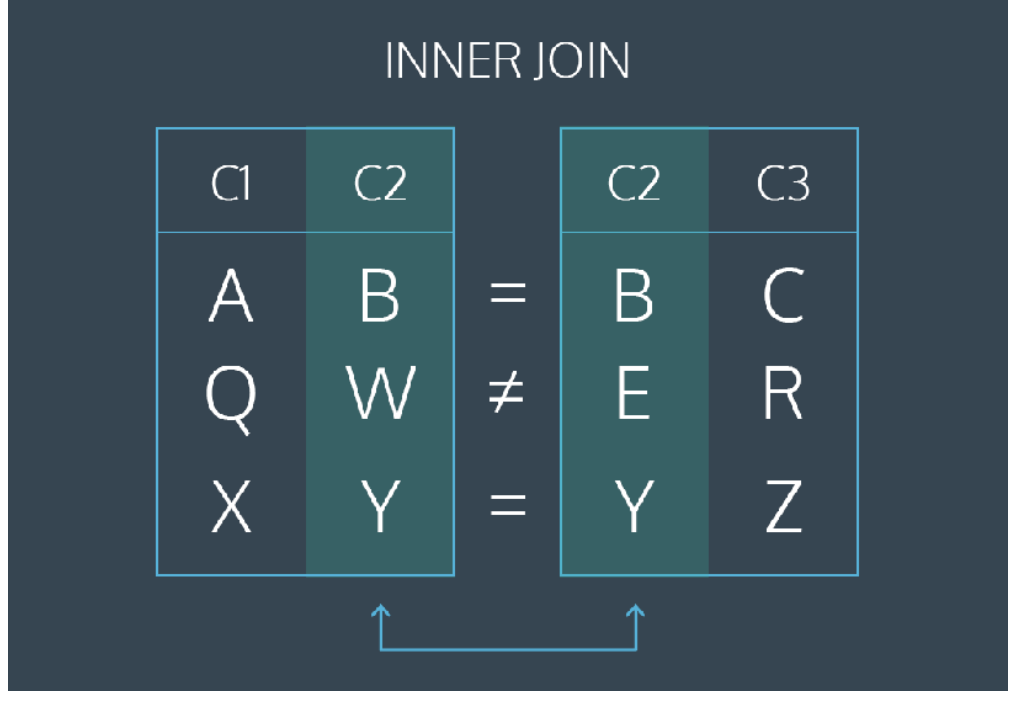
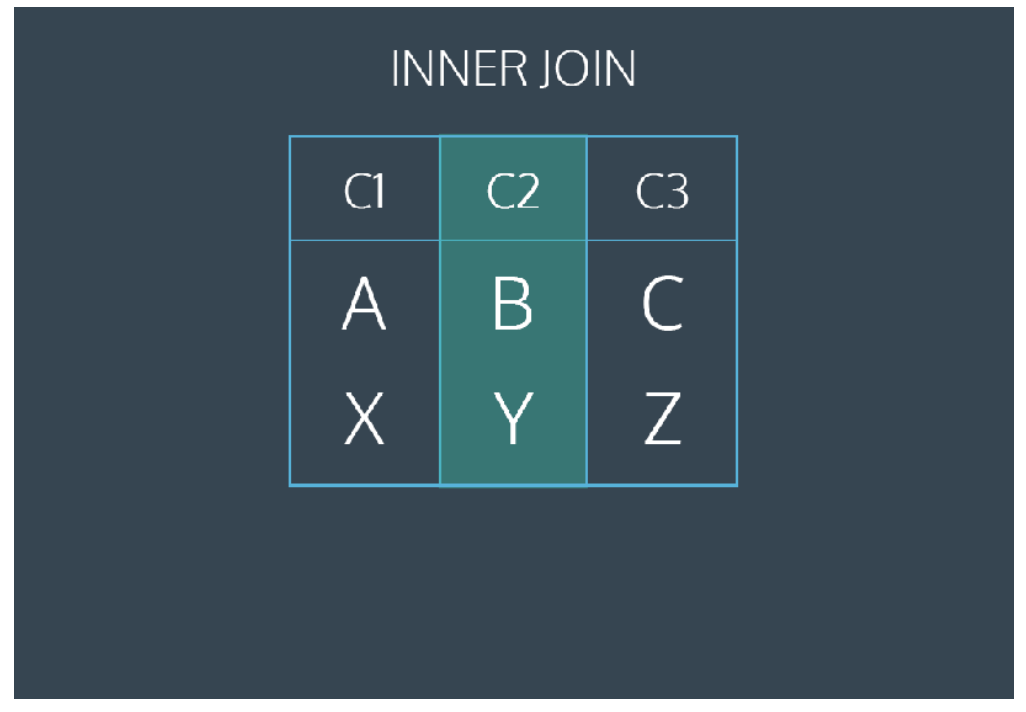

Для INNER JOIN работает следующее правило: присоединяются только те строки таблиц, которые удовлетворяют условию соединения. Если в любой из соединяемых таблиц находятся такие строки, которые не удовлетворяют заявленному условию, — они отбрасываются.

В таблице teams есть данные о 299 различных командах — можем проверить это с помощью запроса.

SELECT 

COUNT(DISTINCT id) /*оператор подсчёта строк; оператор исключения повторяющихся строк; столбец id*/

FROM sql.teams /*таблица teams*/

или

SELECT 

COUNT(DISTINCT api_id) /*оператор подсчёта строк; оператор исключения повторяющихся строк; столбец api_id*/

FROM sql.teams

Теперь добавим к teams таблицу с матчами.

SELECT 

COUNT(DISTINCT t.id) /*оператор подсчёта строк; оператор исключения повторяющихся строк; столбец id*/

FROM 
sql.teams t /*таблица teams с алиасом t*/

JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id /*оператор соединения inner JOIN; таблица teams с алиасом t; условие: home_team_api_id таблицы m равен api_id таблицы t или away_team_api_id таблицы m равен api_id таблицы t*/

И в таблице останется уже не 299 команд, а только 292.

Дело в том, что таблица sql.matches по какой-то причине не содержит информацию о командах Lierse SK, KVC Westerlo, KAS Eupen, Club Brugge KV, KV Oostende, RSC Anderlecht и Hull City, зато они есть в таблице sql.teams. Возможно, эти команды не участвовали ни в одном матче или записи по этим матчам были удалены.

### LEFT OUTER JOIN И RIGHT OUTER JOIN

Также существуют схожие друг с другом типы соединения — LEFT JOIN и RIGHT JOIN (слово outer в операторе можно опустить).

Принцип работы оператора можно описать так:

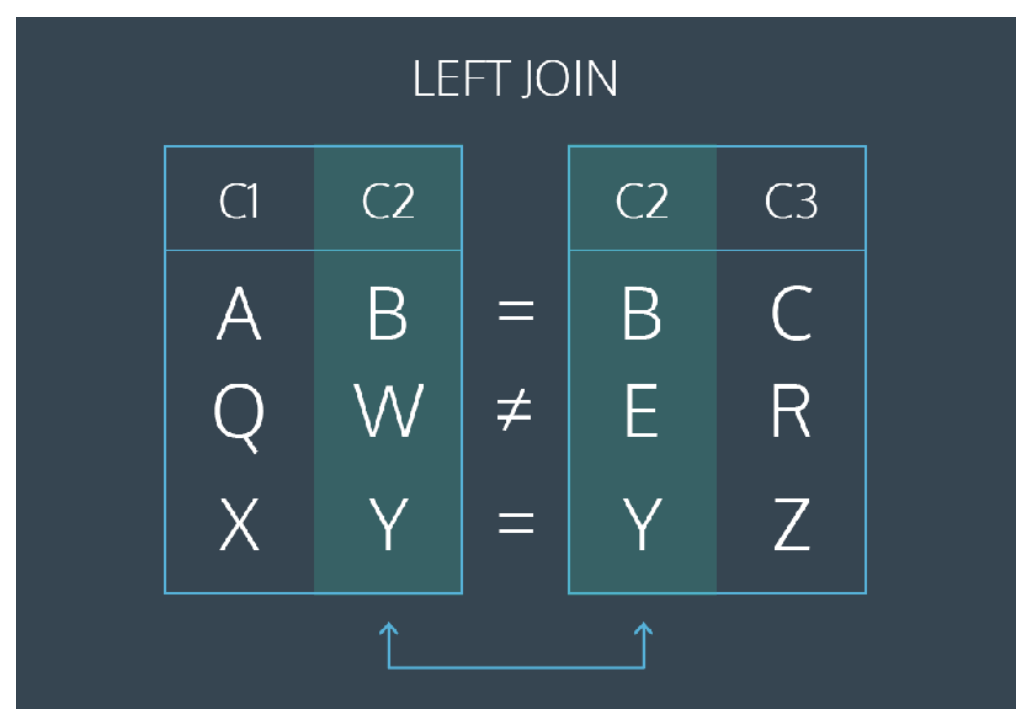
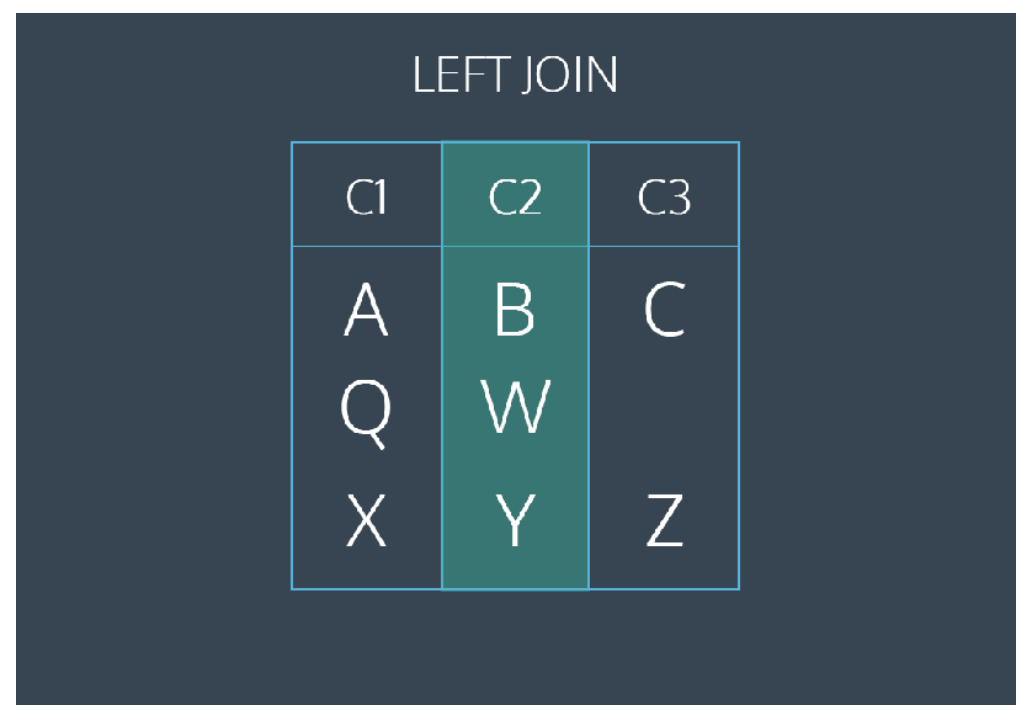

>Для LEFT JOIN работает следующее правило: из левой (относительно оператора) таблицы сохраняются все строки, а из правой добавляются только те, которые соответствуют условию соединения. Если в правой таблице не находится соответствия, то значения строк второй таблицы будут иметь значение NULL.

LEFT JOIN может быть полезен, когда соответствующих записей во второй таблице может не быть, но важно сохранить записи из первой таблицы.

_Почему соответствий может не быть?_

Причины могут быть разные, назовём две основные:
- Различная бизнес-логика таблиц.
    - Пример: в интернет-магазине почти всегда можно оформить заказ с промокодом. Вполне вероятно, что информация о промокодах хранится в отдельной таблице, но при этом не для каждого заказа будет существовать промокод, поскольку покупку можно оформить и без него.
- Разное время обновления таблиц.
    - Пример: клиент зарегистрировался на сайте интернет-магазина и оформил заказ. Данные о регистрации клиентов могут обновляться в базе данных раз в неделю, а о заказах — раз в сутки.
***    
>→ Поставим следующую задачу: вывести полные названия команд, данных по которым нет в таблице matches.

Для начала посмотрим на результат запроса после соединения.

SELECT
    t.long_name, /*столбец long_name таблицы t*/
    m.id /*столбец id таблицы m*/

FROM sql.teams t /*таблица teams с алиасом t*/

LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id /*оператор соединения left 

JOIN; таблица matches с алиасом m; условие: home_team_api_id таблицы m равен api_id таблицы t или away_team_api_id таблицы m равен api_id таблицы t*/

ORDER BY m.id DESC /*сортировка по id таблицы m по убыванию, чтобы увидеть строки со значением null*/

_Вывод: в таблице teams сохранились все записи, а в таблице matches есть пустые строки._

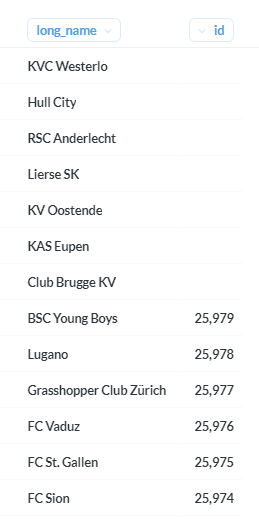

Теперь, чтобы выбрать такие команды, которые не принимали участия в матчах, достаточно добавить условие where m.id is null (или любое другое поле таблицы matches).

SELECT
    t.long_name /*столбец long_name таблицы t*/

FROM 
    sql.teams t /*таблица teams с алиасом t*/

LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id /*оператор соединения left JOIN; таблица matches с алиасом m; условие: home_team_api_id таблицы m равен api_id таблицы t или away_team_api_id таблицы m равен api_id таблицы t*/

WHERE m.id IS NULL /*условие: столбец id таблицы m имеет значение null*/

>Обратите внимание! Если мы добавим какой-либо фильтр по отличному от NULL значению для таблицы matches, то LEFT JOIN превратится в INNER JOIN, поскольку для второй таблицы станет необходимым присутствие такого (NOT NULL) значения в строке.

SELECT
    t.long_name /*столбец long_name таблицы t*/

FROM sql.teams t /*таблица teams с алиасом t*/

LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id /*оператор соединения left JOIN; таблица matches с алиасом m; условие: home_team_api_id таблицы m равен api_id таблицы t или away_team_api_id таблицы m равен api_id таблицы t*/

WHERE
    m.season = '2008/2009'  /*условие: столбец season таблицы m имеет значение 2008/2009*/
AND t.long_name = 'KAS Eupen' /*условие: столбец long_name таблицы t имеет значение KAS Eupen*/

_В ответе Metabase получим No results!, так как вместе с фильтром m.season = '2008/2009' исчезли все строки, значения которых NULL._
***

Используя LEFT JOIN, выведите список уникальных названий команд, содержащихся в таблице matches. Отсортируйте список в алфавитном порядке.

SELECT
    t.long_name /*столбец long_name таблицы t*/

FROM sql.teams t /*таблица teams с алиасом t*/

LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id /*оператор соединения left JOIN; таблица matches с алиасом m; условие: home_team_api_id таблицы m равен api_id таблицы t или away_team_api_id таблицы m равен api_id таблицы t*/

where m.home_team_api_id is not null or m.away_team_api_id is not NULL

GROUP BY t.long_name

ORDER by t.long_name ASC
***

С LEFT JOIN также работают агрегатные функции, что позволяет не потерять значения из левой таблицы. Например, мы можем вывести сумму голов команд по гостевым матчам.

SELECT
    t.long_name,
    SUM(m.away_team_goals) total_goals

FROM 
    sql.teams t /*таблица teams с алиасом t*/

LEFT JOIN sql.matches m ON t.api_id = m.away_team_api_id /*оператор соединения LEFT JOIN; таблица matches с алиасом m; условие: away_team_api_id таблицы m равен api_id таблицы t*/

GROUP BY t.id /*группировка по столбцу id таблицы t*/

ORDER BY 2 DESC /*сортировка по столбцу total_goals по убыванию, чтобы увидеть строки со значением null*/

***

>Обратите внимание! При применении функций SUM, MIN, MAX, AVG к полям со значением NULL в результате получится NULL, а не 0. А при использовании функции COUNT, наоборот, получится 0.

Используя LEFT JOIN, напишите запрос, который выведет полное название команды (long_name), количество матчей, в которых участвовала команда, — домашних и гостевых (matches_cnt). Отсортируйте по количеству матчей в порядке возрастания, затем — по названию команды в алфавитном порядке.

>Мы используем left join Если мы первоначально используем таблицу matches, то в итоге будет таблица с командами и матчами, которые были. Но по условию нам говорится о всех командах и сколько матчей они провели. Не исключено, что есть команды с 0 матчей. Для того, чтобы выявить в т.ч. их, нам нужно именно к командам подтягивать количество матчей (порядок после from и left join)

SELECT
    t.long_name,
    count(m.id) matches_cnt

FROM 
    sql.teams t /*таблица teams с алиасом t*/

LEFT JOIN sql.matches m ON t.api_id = m.away_team_api_id or t.api_id = m.home_team_api_id /*оператор соединения LEFT JOIN; таблица matches с алиасом m; условие: away_team_api_id таблицы m равен api_id таблицы t*/

group By t.id

ORDER BY 2, 1 ASC  /*сортировка по столбцу total_goals по убыванию, чтобы увидеть строки со значением null*/

***

>При использовании RIGHT JOIN сохраняется та же логика, что и для LEFT JOIN, только за основу берётся правая таблица.    
Чтобы из LEFT JOIN получить RIGHT JOIN, нужно просто поменять порядок соединения таблиц.

>Вообще, применение RIGHT JOIN считается плохим тоном, так как язык SQL читается и пишется слева направо, а такой оператор усложняет чтение запросов.

### FULL OUTER JOIN

>Оператор FULL OUTER JOIN объединяет в себе LEFT и RIGHT JOIN и позволяет сохранить кортежи обеих таблиц. Даже если не будет соответствий, мы сохраним все записи из обеих таблиц.

FULL OUTER JOIN может быть полезен в ситуациях, когда схема данных недостаточно нормализована и не хватает таблиц-справочников.

>Пример: в базе данных интернет-магазина есть две таблицы — с зарегистрированными пользователями и пользователями, оформившими заказ. При этом оформить заказ можно без регистрации, а зарегистрироваться — без оформления заказа.

Предположим, что вам необходимо получить полный список пользователей — и оформивших заказ, и зарегистрированных, — но в базе данных этой объединённой таблицы нет. В данном случае можно использовать FULL OUTER JOIN для получения полного списка, соединив таким образом таблицы c заказами и регистрациями по id пользователя.

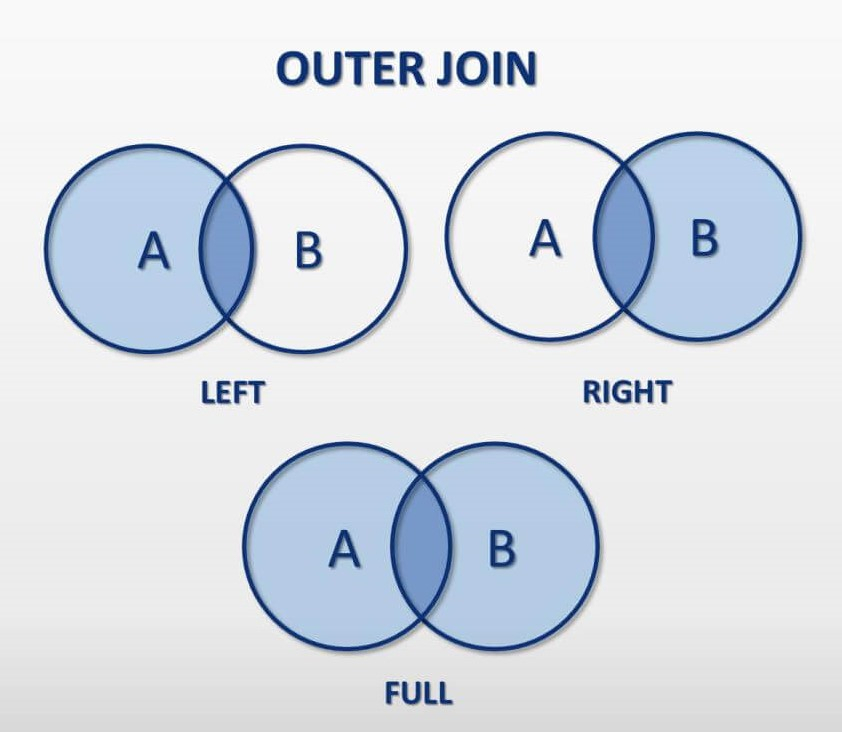

Синтаксис FULL OUTER JOIN аналогичен другим JOIN.

SELECT 
…

FROM
	table1

FULL OUTER JOIN table2 ON условие

__CROSS JOIN__

CROSS JOIN соединяет таблицы так, что каждая запись в первой таблице присоединяется к каждой записи во второй таблице, иначе говоря, даёт декартово произведение.

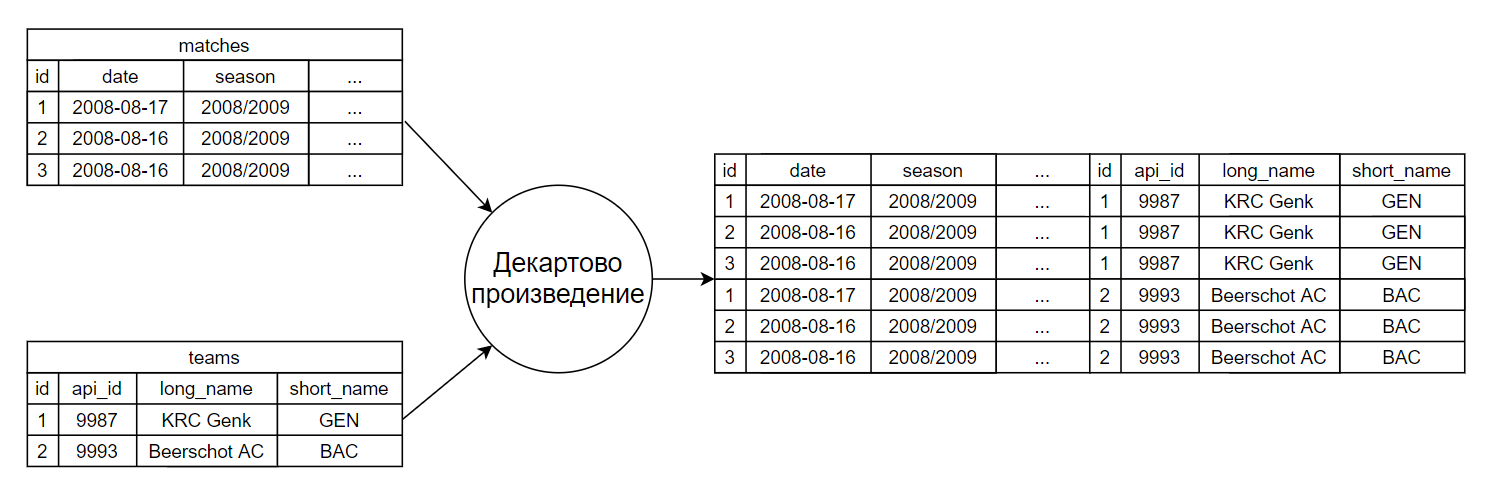

Запись cross join

- через запятую

SELECT * /*выбор всех полей*/

FROM
    sql.teams, /*таблица teams*/
    sql.matches /*таблица matches*/

- через оператор cross join

SELECT * /*выбор всех полей*/

FROM
    sql.teams /*таблица teams*/
    CROSS JOIN sql.matches /*таблица matches*/

>Обратите внимание! Условие для CROSS JOIN, в отличие от других операторов, не требуется.

Также этот запрос можно записать с помощью INNER JOIN с условием on true — результат будет тот же.

SELECT * /*выбор всех полей*/

FROM
    sql.teams /*таблица teams*/
    JOIN sql.matches ON TRUE /*оператор соединения INNER JOIN; таблица matches; условие: для всех случаев*/
    
CROSS JOIN может быть полезен, когда необходимо создать таблицу фактов.

Например, с помощью такого запроса мы можем получить все возможные комбинации полных названий команд в матчах.

SELECT
    DISTINCT /*оператор исключения повторяющихся строк*/
    t1.long_name home_team, /*столбец long_name таблицы t1; новое название*/
    t2.long_name away_team /*столбец long_name таблицы t2; новое название*/

FROM
    sql.teams t1 /*таблица teams с алиасом t1*/
    CROSS JOIN sql.teams t2 /*оператор соединения CROSS JOIN; таблица teams с алиасом t2*/
    
***

Напишите запрос, который выведет все возможные уникальные комбинации коротких названий домашней команды (home_team) и коротких названий гостевой команды (away_team). Отсортируйте запрос по первому и второму столбцам.

SELECT
    DISTINCT /*оператор исключения повторяющихся строк*/
    t1.short_name home_team, /*столбец long_name таблицы t1; новое название*/
    t2.short_name away_team /*столбец long_name таблицы t2; новое название*/

FROM
    sql.teams t1 /*таблица teams с алиасом t1*/
    CROSS JOIN sql.teams t2 /*оператор соединения CROSS JOIN; таблица teams с алиасом t2*/

order by 1, 2

***

NATURAL JOIN

Ключевое слово natural в начале оператора JOIN позволяет не указывать условие соединения таблиц — для соединения будут использованы столбцы с одинаковым названием из этих таблиц.

NATURAL JOIN можно использовать с любыми видами соединений, которые требуют условия соединения:

- NATURAL INNER JOIN (возможна запись NATURAL JOIN);
- NATURAL LEFT JOIN;
- NATURAL RIGHT JOIN;
- NATURAL FULL OUTER JOIN.

При использовании NATURAL JOIN прежде всего стоит обратить внимание на ключи таблиц. Для наших таблиц teams и matches этот вид соединения не подойдёт, так как общим для обеих таблиц является столбец id, но таблицы соединяются по другим столбцам.

Когда у таблиц есть несколько столбцов с одинаковыми именами, при NATURAL JOIN условие соединения будет применено на все столбцы с одинаковыми именами.

То есть для таблиц table1 и table2

table1: id, name, ...

table2: id, name, ...

запрос

SELECT 
…

FROM          table1 NATURAL JOIN table2

будет равнозначен запросу

SELECT
…

FROM          table1 t1

INNER JOIN table2 t2 ON t1.id = t2.id AND t1.name = t2.name

***

### ОБЩАЯ ЛОГИКА ПОСТРОЕНИЯ ЗАПРОСА С JOIN

При построении запроса с несколькими JOIN старайтесь идти слева направо. Сначала выберите таблицу, которая является центральной в соответствии с поставленной задачей, вопросом. Затем добавляйте таблицы поэтапно в зависимости от бизнес-логики запроса.

Например, для ответа на вопрос: «Какая команда сыграла больше всех матчей в сезоне 2010/2011?» в качестве центральной лучше выбрать таблицу с командами.

А для ответа на вопрос: «В каком сезоне участвовало больше всего команд?» — таблицу с матчами.

>Стоит отметить, что из рассмотренных видов соединений чаще всего используются INNER JOIN и LEFT JOIN. Другие операторы используются реже, но стоит помнить об их существовании при решении нестандартных задач.

***
### Виды Join:

- __CROSS JOIN__ соединяет таблицы так, что каждая запись в первой таблице присоединяется к каждой записи во второй таблице ― иначе говоря, даёт декартово произведение.
- __INNER JOIN__ — это тот же JOIN (слово INNER в операторе можно опустить). Для INNER JOIN работает следующее правило: присоединяются только те строки таблиц, которые удовлетворяют условию соединения. Если в любой из соединяемых таблиц находятся такие строки, которые не удовлетворяют заявленному условию, — они отбрасываются.
- Ключевое слово __NATURAL__ в начале оператора JOIN позволяет не указывать условие соединения таблиц — для соединения будут использованы столбцы с одинаковым названием из этих таблиц. NATURAL JOIN можно использовать с любыми видами соединений, которые требуют определённого условия:
    - NATURAL INNER JOIN (возможна запись NATURAL JOIN);
    - NATURAL LEFT JOIN;
    - NATURAL RIGHT JOIN;
    - NATURAL FULL OUTER JOIN.
    
    При использовании NATURAL JOIN прежде всего стоит обратить внимание на ключи таблиц. Когда у таблиц есть несколько столбцов с одинаковыми именами, при NATURAL JOIN условие соединения будет применено на все столбцы с одинаковыми именами.
- Для __LEFT JOIN__ работает следующее правило: из левой (относительно оператора) таблицы сохраняются все строки, а из правой добавляются только те, которые соответствуют условию соединения. Если в правой таблице не находится соответствия, то значения строк второй таблицы будут иметь значение NULL. LEFT JOIN полезен, когда соответствующих записей во второй таблице может не быть, но важно сохранить записи из первой таблицы. Чтобы из LEFT JOIN получить RIGHT JOIN, нужно просто поменять порядок соединения таблиц.
- Оператор __FULL OUTER JOIN__ объединяет в себе LEFT и RIGHT JOIN и позволяет сохранить кортежи обеих таблиц. Даже если не будет соответствий, мы сохраним все записи из обеих таблиц. FULL OUTER JOIN может быть полезен в ситуациях, когда схема данных недостаточно нормализована и не хватает таблиц-справочников.
    - Пример: в базе данных интернет-магазина есть две таблицы — с зарегистрированными пользователями и пользователями, оформившими заказ. При этом оформить заказ можно без регистрации, а зарегистрироваться — без оформления заказа. Предположим, что вам необходимо получить полный список пользователей — и оформивших заказ, и зарегистрированных, — но в базе данных этой объединённой таблицы нет. В данном случае можно использовать FULL OUTER JOIN для получения полного списка, соединив таким образом таблицы c заказами и регистрациями по id пользователя.
- Для __RIGHT JOIN__ работает следующее правило: из правой (относительно оператора) таблицы сохраняются все строки, а из левой добавляются только те, которые соответствуют условию соединения. Если в левой таблице не находится соответствия, то значения строк второй таблицы будут иметь значение NULL. RIGHT JOIN полезен, когда соответствующих записей во второй таблице может не быть, но важно сохранить записи из первой таблицы. Чтобы из RIGHT JOIN получить LEFT JOIN, нужно просто поменять порядок соединения таблиц. __Вообще, применение RIGHT JOIN считается дурным тоном, так как язык SQL читается и пишется слева направо, и этот оператор усложняет чтение запросов.__

### Логика запросов

>При построении запроса с несколькими JOIN старайтесь идти слева направо. Сначала выберите таблицу, которая является центральной в соответствии с поставленной задачей, вопросом. Затем добавляйте таблицы поэтапно в зависимости от бизнес-логики запроса. Стоит отметить, что из рассмотренных видов соединений чаще всего используются INNER JOIN и LEFT JOIN. Другие операторы используются реже, но стоит помнить об их существовании при решении нестандартных задач.



В этом модуле вы познакомились с разными способами вертикального соединения таблиц.

Теперь вы умеете:

- соединять таблицы по ключу;
- соединять таблицы с помощью оператора JOIN;
- использовать разные виды JOIN;
- применять агрегации к объединённым таблицам и фильтровать вывод.

***

Напишите запрос, который выведет список уникальных полных названий команд (long_name), игравших в гостях в матчах сезона 2012/2013. Отсортируйте список в алфавитном порядке.

SELECT
    distinct
    long_name

FROM
    sql.teams t /*таблица teams с алиасом t1*/
    inner JOIN sql.matches m on t.api_id = m.away_team_api_id /*оператор соединения CROSS JOIN; таблица teams с алиасом t2*/

Where m.season = '2012/2013'

order by 1

***

Напишите запрос, который выведет полное название команды (long_name) и общее количество матчей (matches_cnt), сыгранных командой Inter в домашних матчах.

SELECT
    t.long_name,
    count(m.id) matches_cnt

FROM
    sql.teams t /*таблица teams с алиасом t1*/
    inner JOIN sql.matches m on t.api_id = m.home_team_api_id /*оператор соединения CROSS JOIN; таблица teams с алиасом t2*/

Where t.long_name = 'Inter'

Group by t.long_name
***

Напишите запрос, который выведет топ-10 команд (long_name) по суммарному количеству забитых голов в гостевых матчах. Во втором столбце запроса выведите суммарное количество голов в гостевых матчах (total_goals).

SELECT
    t.long_name,
    sum(m.away_team_goals) total_goals

FROM
    sql.teams t /*таблица teams с алиасом t1*/
    inner JOIN sql.matches m on t.api_id = m.away_team_api_id /*оператор соединения CROSS JOIN; таблица teams с алиасом t2*/

Group by t.long_name

limit 10

***

SELECT
    t.long_name,
    sum(m.away_team_goals) total_goals

FROM
    sql.matches m /*таблица teams с алиасом t1*/
    inner JOIN sql.teams t on t.api_id = m.away_team_api_id /*оператор соединения CROSS JOIN; таблица teams с алиасом t2*/

Group by t.long_name 

order by total_goals DESC

limit 10

***

Выведите количество матчей между командами Real Madrid CF и FC Barcelona. В поле ниже введите запрос, с помощью которого вы решили задание.

SELECT count(m.id)

FROM
    sql.matches m /*таблица teams с алиасом t1*/
    JOIN sql.teams a on a.api_id = m.away_team_api_id 
    Join sql.teams h on h.api_id = m.home_team_api_id/*оператор соединения CROSS JOIN; таблица teams с алиасом t2*/

WHERE (a.long_name = 'Real Madrid CF' and h.long_name = 'FC Barcelona') or (h.long_name = 'Real Madrid CF' and a.long_name = 'FC Barcelona')


***

Напишите запрос, который выведет название команды (long_name), сезон (season) и суммарное количество забитых голов в домашних матчах (total_goals). Оставьте только те строки, в которых суммарное количество голов менее десяти. Отсортируйте запрос по названию команды, а затем — по сезону.

SELECT long_name, season, sum(home_team_goals) total_goals

FROM
    sql.matches m 
    JOIN sql.teams t on t.api_id = m.home_team_api_id 
    
Group by long_name, season

having sum(home_team_goals) < 10 

order by long_name, season


1. Объясните разницу между левым (LEFT) и внутренним (INNER) соединениями.
    - В иннер присоединяються только те строки обеих таблиц, которые удовлетворяют соединению (join), остальные отбрасываються.
    - В лефт присоединяються все строки левой таблицы, а из правой таблицы которые удовлетворяют соединению (join), а остальные заменяються на NULL (если нет удовлетворяющих соединению, то тоже NULL)
    - __ОФФ ответ__ Соединения — это способы объединения данных из двух разных таблиц (левой и правой) в новую.Принцип работы соединений заключается в объединении строк между двумя таблицами; набор ключевых столбцов используется для поиска данных в двух одинаковых таблицах, которые необходимо соединить.В случае левого соединения каждая строка из левой таблицы появляется в полученной таблице, но строки из правой появляются, только если значения в их ключевых столбцах отображаются в левой. При внутреннем соединении обе строки из левой и правой таблиц появляются, только если есть совпадающая строка в другой таблице.На практике вы можете воспринимать левое соединение как добавление данных из правой таблицы к левой, если она существует (например, с использованием правой таблицы в качестве подстановочной). Внутреннее соединение больше похоже на поиск всех общих данных и создание новой таблицы только из пар.
    
2. Перед вами школьная таблица TABLE_A с оценками от 0 до 100, выставленными ученикам нескольких классов. Как бы вы рассчитали максимальную оценку в каждом классе?
    - SELECT Класс, MAX(Оценка) FROM TABLE_A GROUP BY Класс
    - __офф ответ__. SELECT CLASS, MAX(GRADE) INTO TABLE_B FROM TABLE_A GROUP BY CLASS (Этот запрос группирует данные по каждому классу, а затем находит максимальное значение. Он дополнительно сохраняет результаты в новую таблицу (TABLE_B), чтобы их можно было запросить позже.)

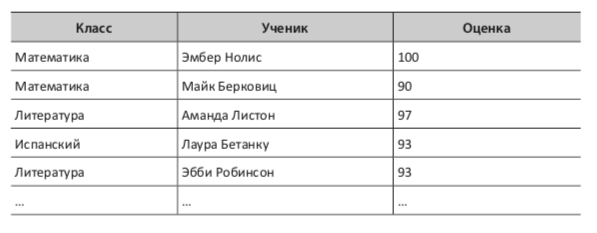
     
3. Как найти не только самую высокую оценку в каждом классе и учащегося, получившего её?
    - SELECT Класс, Ученик, MAX(Оценка) FROM TABLE_A GROUP BY Ученик HAVING MAX(Оценка)=100 (групируем по ученику так как в классе может быть несколько учеников получивших оценку 100)
    - __офф ответ__  SELECT a.CLASS, a.GRADE, a.STUDENT FROM TABLE_A a INNER JOIN TABLE_B b ON a.CLASS = b.CLASS AND a.GRADE = b.GRADE (Этот запрос выбирает всех учащихся и их оценки из исходной таблицы TABLE_A, где указаны классы и оценки, которые отображаются в таблице максимальных значений TABLE_B. Внутреннее соединение работает как фильтр, сохраняя только максимальные комбинации классов/оценок, потому что только в этом случае оценка появляется в таблице TABLE_B.)


